In [281]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from collections import namedtuple

import seaborn as sns

In [2]:
main = pd.read_excel('movantanalysis.xlsx', sheet_name = 'KM Data Edits')
datapull = pd.read_excel('movantanalysis.xlsx', sheet_name = 'Data Pull Sheet')
aums = pd.read_excel('movantanalysis.xlsx', sheet_name = 'All Institution AUMs')
removed = pd.read_excel('movantanalysis.xlsx', sheet_name = 'Removed cases')

### General Processing

In [3]:
main = main.merge(datapull[['Ticker','Damage Bucket']], how = 'left', on = 'Ticker')

### I. MOVANT ANALYSIS BY REPORTED DAMAGES BY BUCKET

#### I. A. Number of Cases by Bucket

In [13]:
data_1a = datapull['Damage Bucket'].value_counts()

In [270]:
y_val = data_1a.sort_index()
x_val = data_1a.sort_index().index

<Figure size 432x288 with 0 Axes>

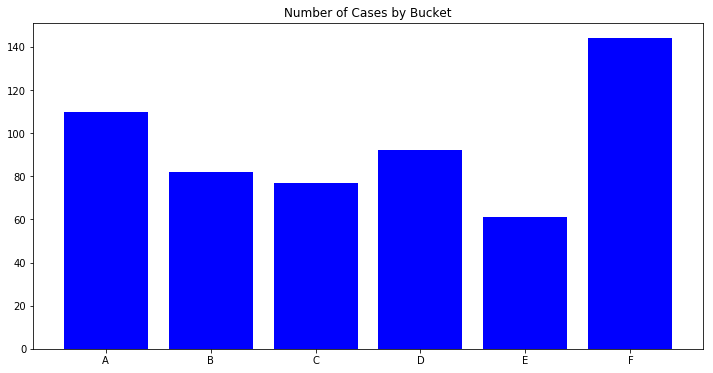

In [222]:
plt.clf()
plt.figure(figsize=(12,6))
plt.bar(x_val, y_val, color="b")
plt.title('Number of Cases by Bucket')
plt.show()


#### I.B. Analysis by Bucket

In [335]:
data_1b = datapull[['Damage Bucket', 'Docket Number','Total Damages', '% of Total Damages']].dropna()
data_1b['Total Damages'] = pd.to_numeric(data_1b['Total Damages'], errors='coerce').fillna(0)
data_1b['% of Total Damages'] = pd.to_numeric(data_1b['% of Total Damages'], errors='coerce').fillna(0)

In [337]:
data_1b_total = data_1b[['Damage Bucket', 'Docket Number','Total Damages']]
data_1b_describe_total = data_1b_total.pivot(index = 'Docket Number', columns = 'Damage Bucket', values = 'Total Damages')
data_1b_describe_total = data_1b_describe_total.describe()
data_1b_describe_total = pd.concat([data_1b_describe_total, pd.DataFrame(np.sort(data_1b_bycol.fillna(0), axis = 0)[-2:,:], columns = data_1a.sort_index().index, index = ['Largest', '2nd Largest'])])

In [336]:
data_1b_bps = data_1b[['Damage Bucket', 'Docket Number','% of Total Damages']]
data_1b_describe_bps = data_1b_bps.pivot(index = 'Docket Number', columns = 'Damage Bucket', values = '% of Total Damages')
data_1b_describe_bps = data_1b_describe_bps.describe()
data_1b_describe_bps = pd.concat([data_1b_describe_bps, pd.DataFrame(np.sort(data_1b_bycol.fillna(0), axis = 0)[-2:,:], columns = data_1a.sort_index().index, index = ['Largest', '2nd Largest'])])

In [320]:
x_val = np.sort(data_1b['Damage Bucket'].unique())

<Figure size 432x288 with 0 Axes>

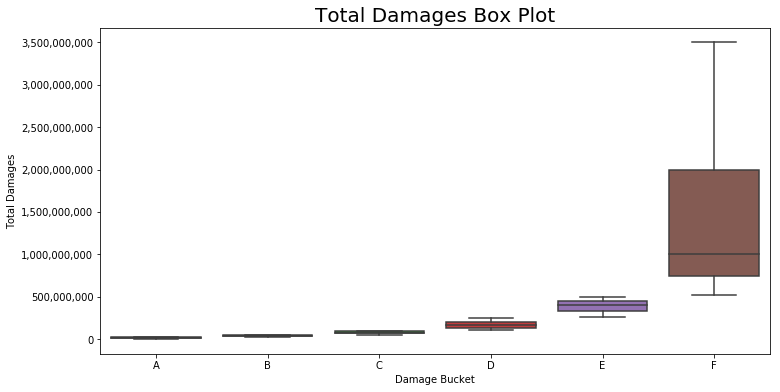

In [343]:
plt.clf()
plt.figure(figsize=(12,6))
plt.title("Total Damages Box Plot", size = 20)
ax = sns.boxplot(y = 'Total Damages', x = 'Damage Bucket', data = data_1b_total, order = x_val, showfliers=False)
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda y, p: format(int(y), ',')))
plt.show()

In [346]:
pd.options.display.float_format = '{:.0f}'.format
print("By Total Damage")
data_1b_describe_total

By Total Damage


Damage Bucket,A,B,C,D,E,F
count,110,82,77,92,61,144
mean,11848636,38815854,75870130,171467391,392967213,2385520833
std,7383037,6610158,14436203,42049539,76220506,4046534549
min,0,26000000,52000000,102000000,260000000,515000000
25%,5625000,35000000,65000000,135000000,325000000,747500000
50%,10000000,40000000,75000000,162500000,400000000,1000000000
75%,17750000,45000000,90000000,200000000,450000000,2000000000
max,25000000,50000000,100000000,250000000,500000000,25000000000
Largest,25000000,50000000,100000000,250000000,500000000,25000000000
2nd Largest,25000000,50000000,100000000,250000000,500000000,25000000000


In [345]:
pd.options.display.float_format = '{:,.2%}'.format
print("By BPS")
data_1b_describe_bps

By BPS


Damage Bucket,A,B,C,D,E,F
count,"11,000.00%","8,200.00%","7,700.00%","9,200.00%","6,100.00%","14,400.00%"
mean,2.82%,1.14%,0.34%,0.49%,0.30%,0.40%
std,5.56%,2.06%,0.85%,1.02%,0.60%,1.03%
min,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
25%,0.09%,0.05%,0.01%,0.04%,0.01%,0.00%
50%,0.70%,0.33%,0.09%,0.16%,0.06%,0.04%
75%,2.57%,1.42%,0.29%,0.40%,0.28%,0.23%
max,34.72%,13.61%,6.80%,6.43%,3.06%,7.29%
Largest,"2,500,000,000.00%","5,000,000,000.00%","10,000,000,000.00%","25,000,000,000.00%","50,000,000,000.00%","2,500,000,000,000.00%"
2nd Largest,"2,500,000,000.00%","5,000,000,000.00%","10,000,000,000.00%","25,000,000,000.00%","50,000,000,000.00%","2,500,000,000,000.00%"


In [331]:
print("By BPS")
data_1b_describe_bps

By BPS


Damage Bucket,A,B,C,D,E,F
count,110,82,77,92,61,144
mean,11848636,38815854,75870130,171467391,392967213,2385520833
std,7383037,6610158,14436203,42049539,76220506,4046534549
min,0,26000000,52000000,102000000,260000000,515000000
25%,5625000,35000000,65000000,135000000,325000000,747500000
50%,10000000,40000000,75000000,162500000,400000000,1000000000
75%,17750000,45000000,90000000,200000000,450000000,2000000000
max,25000000,50000000,100000000,250000000,500000000,25000000000
Largest,25000000,50000000,100000000,250000000,500000000,25000000000
2nd Largest,25000000,50000000,100000000,250000000,500000000,25000000000


,A,B,C,D,E,F
Largest,25000000,50000000,100000000,250000000,500000000,25000000000
2nd Largest,25000000,50000000,100000000,250000000,500000000,25000000000


In [ ]:
n

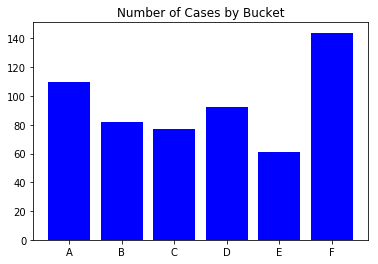

In [91]:
plt.clf()
plt.bar(x_val, y_val, color="b")
plt.title('Number of Cases by Bucket')
plt.show()

In [ ]:
#### Number of Cases by Bucket

y_val = datapull['Damage Bucket'].value_counts().sort_index()
x_val = datapull['Damage Bucket'].value_counts().sort_index().index

plt.clf()
plt.bar(x_val, y_val, color="b")
plt.show()

### MOVANT ANALYSIS BY REPORTED DAMAGES BY BUCKET

In [ ]:
bucketmovantcount = main['Damage Bucket'].value_counts().sort_index()

In [ ]:
bucketmovantcount

AttributeError: Unknown property col

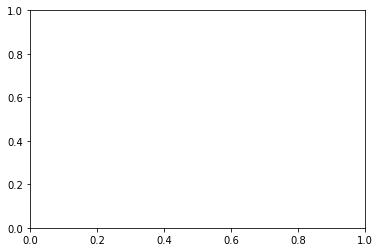

In [5]:
fig, ax = plt.subplots() 

ind = np.arange(len(y_val))
bar_width = 0.75

ax.bar(ind, y_val, bar_width, col = 'b')
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue')

plt.title('Number of Classes by Bucket', size = 16)

fig.tight_layout()

plt.show()